In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C:\Users\Asus\AppData\Local\Temp\ipykernel_28036\3989964598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette=['green','red'])


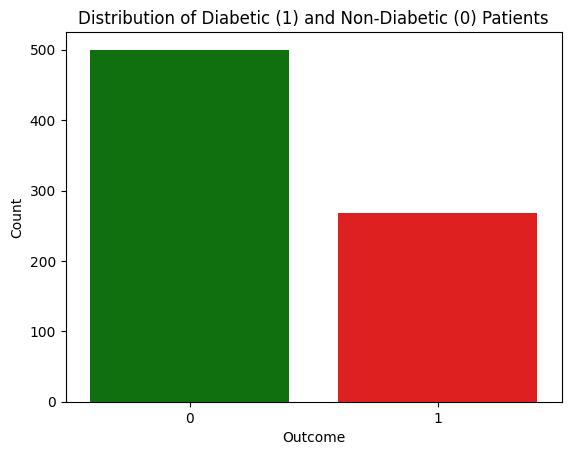

In [3]:
# Count plot of Outcome (0 = Non-Diabetic, 1 = Diabetic)
sns.countplot(x='Outcome', data=df, palette=['green','red'])
plt.title('Distribution of Diabetic (1) and Non-Diabetic (0) Patients')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


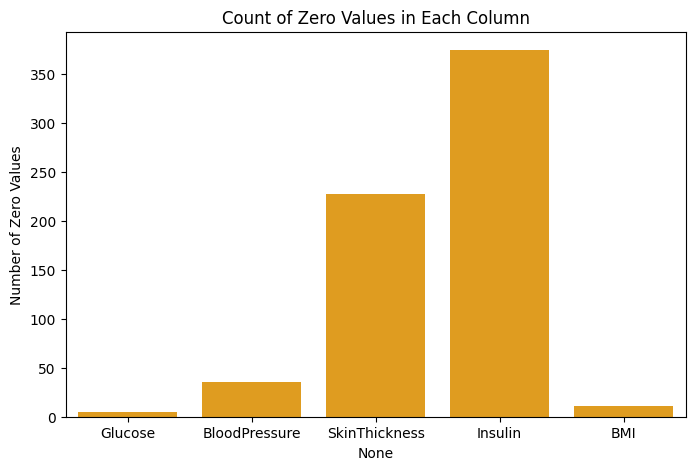

In [4]:
# Columns where zero is biologically invalid
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zeros in each column
zero_counts = (df[invalid_cols] == 0).sum()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=zero_counts.index, y=zero_counts.values, color='orange')
plt.title('Count of Zero Values in Each Column')
plt.ylabel('Number of Zero Values')
plt.show()

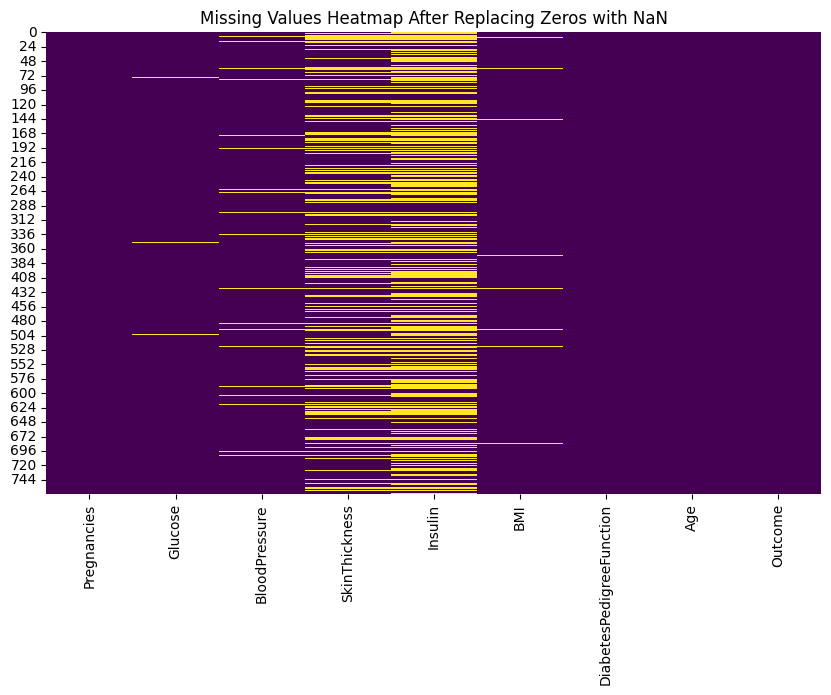

In [5]:
# Replace 0s with NaN in invalid columns
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Visualize missing data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Replacing Zeros with NaN')
plt.show()

In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


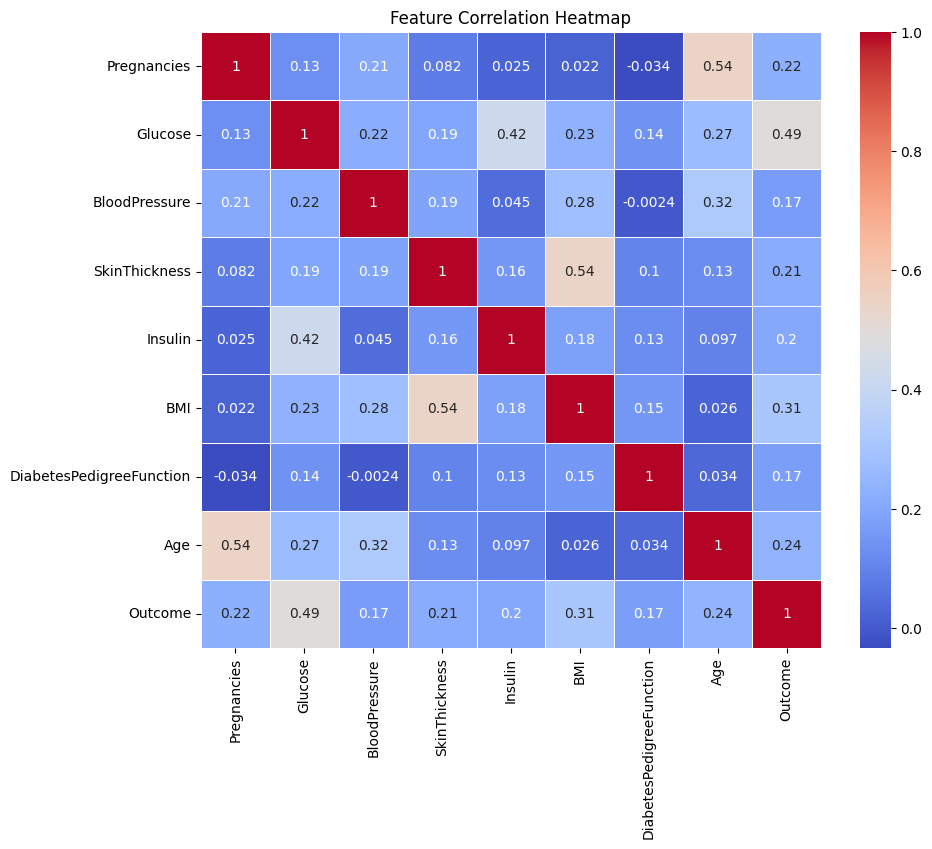

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train_resampled)

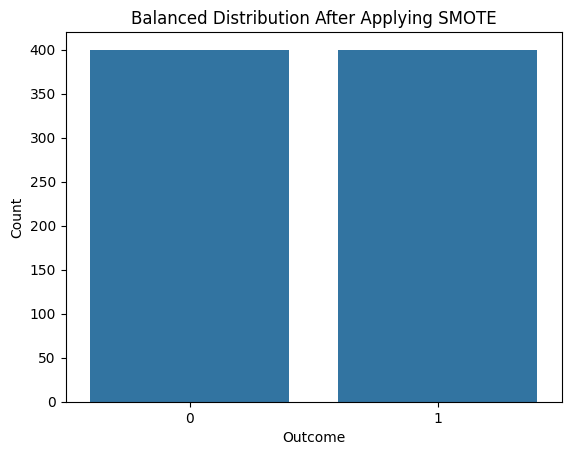

In [12]:
balanced_df = pd.DataFrame({'Outcome': y_train_resampled})

# Now plot it
sns.countplot(x='Outcome', data=balanced_df)
plt.title('Balanced Distribution After Applying SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
X_test_scaled = scaler.transform(X_test)


In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 77.92%


In [16]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7792207792207793
Precision: 0.7272727272727273
Recall: 0.5925925925925926
F1 Score: 0.6530612244897959

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



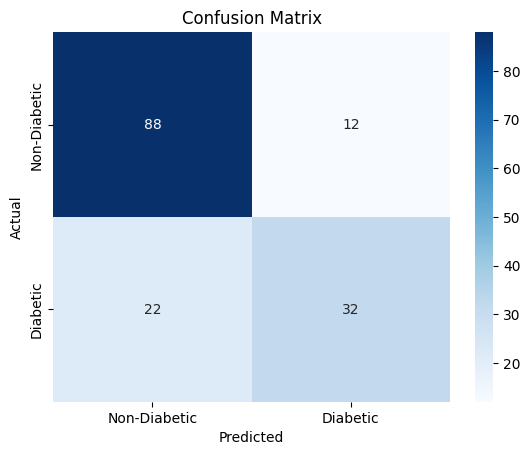

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [19]:
import pickle
from sklearn.metrics import accuracy_score

# Load the model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Scale X_test before prediction
X_test_scaled = scaler.transform(X_test)

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled)

# Evaluate accuracy
print("Accuracy of loaded model:", accuracy_score(y_test, y_pred_loaded))



Accuracy of loaded model: 0.6493506493506493


C:\Stefinkunii - VS code\ml_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
